In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score

In [ ]:
adult_df = pd.read_table("adult_train.csv", delimiter=',',na_values=[" ?"])
adult_df #32561 rows x 14 columns

adult_df_test = pd.read_table("adult_test.csv", delimiter=',',na_values=[" ?"])
adult_df_test #16281 rows × 13 columns

In [ ]:
adult_df_drp = adult_df.dropna()
adult_df_drp #30162 rows x 14 columns

Text(0.5, 1.0, 'Race')

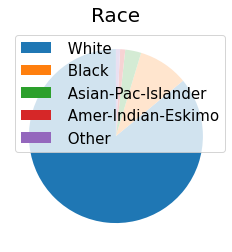

In [152]:
counts = adult_df_drp['race'].value_counts()
labels = counts.index

#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=15)
plt.title("Race",size=20)

Text(0.5, 1.0, 'Sex')

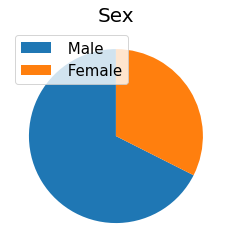

In [153]:
counts = adult_df_drp['sex'].value_counts()
labels = counts.index

#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=15)
plt.title("Sex",size=20)

In [ ]:
counts = adult_df_drp['income'].value_counts()
labels = counts.index


#Plot pie chart
plt.pie(counts, startangle=90)
plt.legend(labels, loc=2,fontsize=15)
plt.title("income",size=20)

In [155]:
age_column = adult_df_drp['age']
#age_column
edu_num = adult_df_drp['education-num']
#edu_num
capital_gain = adult_df_drp['capital-gain']
capital_loss = adult_df_drp['capital-loss']

df_fair = adult_df_drp[['race','sex']]

#Define protected variables 
# for r in df_fair['race']:
#   print(r.replace(" ", ""))
#   r = r.replace(" ", "")
#   if(r=='White'):
#     df_fair.append({'priv_race': 1})
#   else:
#     df_fair.append({'priv_race': 0})

df_fair['priv_race'] = [1 if r.replace(" ", "")=='White' else 0 for r in df_fair['race']]
df_fair['priv_sex'] = [1 if s.replace(" ", "")=='Male' else 0 for s in df_fair['sex']]
df_fair

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,race,sex,priv_race,priv_sex
0,White,Male,1,1
1,White,Male,1,1
2,White,Male,1,1
3,Black,Male,0,1
4,Black,Female,0,0
...,...,...,...,...
32556,White,Female,1,0
32557,White,Male,1,1
32558,White,Female,1,0
32559,White,Male,1,1


In [156]:
age_column_test = adult_df_test['age']
#age_column
edu_num_test = adult_df_test['education-num']
#edu_num
capital_gain_test = adult_df_test['capital-gain']
capital_loss_test = adult_df_test['capital-loss']

df_fair_test = adult_df_test[['race','sex']]

#Define protected variables 
# for r in df_fair['race']:
#   print(r.replace(" ", ""))
#   r = r.replace(" ", "")
#   if(r=='White'):
#     df_fair.append({'priv_race': 1})
#   else:
#     df_fair.append({'priv_race': 0})

df_fair_test['priv_race'] = [1 if r.replace(" ", "")=='White' else 0 for r in df_fair_test['race']]
#df_fair['priv_sex'] = [1 if s.replace(" ", "")=='Male' else 0 for s in df_fair['sex']]
#df_fair

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Train Encoder

In [157]:
adult_df_enc = adult_df_drp.apply(LabelEncoder().fit_transform)
adult_df_enc
adult_df_enc['age'] = age_column
adult_df_enc['education-num'] = edu_num
adult_df_enc['capital-gain'] = capital_gain
adult_df_enc['capital-loss'] = capital_loss
adult_df_enc['race'] = df_fair['priv_race']
adult_df_enc

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13,4,0,1,1,1,2174,0,39,38,0
1,50,4,9,13,2,3,0,1,1,0,0,12,38,0
2,38,2,11,9,0,5,1,1,1,0,0,39,38,0
3,53,2,1,7,2,5,0,0,1,0,0,39,38,0
4,28,2,9,13,2,9,5,0,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,7,12,2,12,5,1,0,0,0,37,38,0
32557,40,2,11,9,2,6,0,1,1,0,0,39,38,1
32558,58,2,11,9,6,0,4,1,0,0,0,39,38,0
32559,22,2,11,9,4,0,3,1,1,0,0,19,38,0


Test encoder

In [158]:
adult_test_enc = adult_df_test.apply(LabelEncoder().fit_transform)
#adult_test_enc
adult_test_enc['age'] = age_column_test
adult_test_enc['education-num'] = edu_num_test
adult_test_enc['capital-gain'] = capital_gain_test
adult_test_enc['capital-loss'] = capital_loss_test
adult_test_enc['race'] = df_fair_test['priv_race']
adult_test_enc

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,1,7,4,6,3,0,1,0,0,39,37
1,38,3,11,9,2,4,0,1,1,0,0,49,37
2,28,1,7,12,2,10,0,1,1,0,0,39,37
3,44,3,15,10,2,6,0,0,1,7688,0,39,37
4,18,8,15,10,4,14,3,1,0,0,0,29,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,3,9,13,0,9,1,1,0,0,0,35,37
16277,64,8,11,9,6,14,2,0,1,0,0,39,37
16278,38,3,9,13,2,9,0,1,1,0,0,49,37
16279,44,3,9,13,0,0,3,0,1,5455,0,39,37


In [159]:
y_lbl=adult_df_enc.income
x_lbl=adult_df_enc.drop('income', axis=1)

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x_lbl, y_lbl, test_size=0.3, random_state=13)

In [161]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21113, 13)
(9049, 13)
(21113,)
(9049,)


In [162]:
#classifying using linear SVM
classifier = LinearSVC(random_state = 27)
classifier.fit(x_train, y_train)
y_predSVC = classifier.predict(x_test)
y_predSVC

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


array([0, 0, 0, ..., 1, 0, 0])

In [163]:
#classifying using logistic regression
w = {0:1, 1:9}
lg1 = LogisticRegression(random_state=13, class_weight=w)
lg1.fit(x_train, y_train)
y_predLogistic = lg1.predict(x_test)
y_predLogistic

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([1, 0, 1, ..., 1, 0, 0])

In [164]:
#decision tree
decisionTree = DecisionTreeClassifier(class_weight={0: 1, 1: 1.5}, random_state = 27)
decisionTree.fit(x_train,y_train)
y_predDT = decisionTree.predict(x_test)
y_predDT

array([0, 0, 1, ..., 0, 0, 0])

In [165]:
#random forest
rfc = RandomForestClassifier(random_state = 27, max_depth = 8)
rfc.fit(x_train, y_train)
y_predRFC = rfc.predict(x_test)
y_predRFC

array([0, 0, 0, ..., 1, 0, 0])

In [166]:
#adaboost
abc = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(class_weight= {0:1, 1:1.5}))
adaBoost = abc.fit(x_train, y_train)
y_predAB = adaBoost.predict(x_test)
y_predAB

array([0, 0, 1, ..., 0, 0, 0])

In [167]:
#XGBoost  
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

#Get predictions
y_predXG = model.predict(x_test)
y_predXG_test = model.predict(adult_test_enc)

y_predXG

array([0, 0, 0, ..., 1, 0, 0])

In [148]:
print(y_predXG_test)
#to_submit = list(map(int, to_submit))
np.savetxt(r'format.txt', y_predXG_test, fmt='%s')

[0 0 0 ... 1 0 1]


In [168]:
print("F1: SVC: ",f1_score(y_test, y_predSVC))

print("F1: Logistic Reg: ",f1_score(y_test, y_predLogistic))

print("F1: Decision Tree: ",f1_score(y_test, y_predDT))

print("F1: Random Forest: ",f1_score(y_test, y_predRFC))

print("F1: AdaBoost: ",f1_score(y_test, y_predAB))

print("F1: XGBoost: ",f1_score(y_test, y_predXG))

F1: SVC:  0.5135278514588859
F1: Logistic Reg:  0.5130217623974312
F1: Decision Tree:  0.6286701208981003
F1: Random Forest:  0.6495726495726496
F1: AdaBoost:  0.6502620186830713
F1: XGBoost:  0.6895151053566895


In [169]:
print('Accuracy Score SVM: ',metrics.accuracy_score(y_test,y_predSVC)*100,'%',sep='')
print('Confusion Matrix SVM: ',metrics.confusion_matrix(y_test,y_predSVC), sep = '\n')

print('Accuracy Score Logistic Reg: ',metrics.accuracy_score(y_test,y_predLogistic)*100,'%',sep='')
print('Confusion Matrix Logistic Reg: ',metrics.confusion_matrix(y_test,y_predLogistic), sep = '\n')

print('Accuracy Score Decision Tree: ',metrics.accuracy_score(y_test,y_predDT)*100,'%',sep='')
print('Confusion Matrix Decision Tree: ',metrics.confusion_matrix(y_test,y_predDT), sep = '\n')

print('Accuracy Score Random Forest: ',metrics.accuracy_score(y_test,y_predRFC)*100,'%',sep='')
print('Confusion Matrix Random Forest: ',metrics.confusion_matrix(y_test,y_predRFC), sep = '\n')

print('Accuracy Score AdaBoost: ',metrics.accuracy_score(y_test,y_predAB)*100,'%',sep='')
print('Confusion Matrix AdaBoost: ',metrics.confusion_matrix(y_test,y_predAB), sep = '\n')

print('Accuracy Score XGBoost: ',metrics.accuracy_score(y_test,y_predXG)*100,'%',sep='')
print('Confusion Matrix XGBoost: ',metrics.confusion_matrix(y_test,y_predXG), sep = '\n')


Accuracy Score SVM: 79.73256713449%
Confusion Matrix SVM: 
[[6247  547]
 [1287  968]]
Accuracy Score Logistic Reg: 54.746380815559725%
Confusion Matrix Logistic Reg: 
[[2797 3997]
 [  98 2157]]
Accuracy Score Decision Tree: 80.99237484804951%
Confusion Matrix Decision Tree: 
[[5873  921]
 [ 799 1456]]
Accuracy Score Random Forest: 85.50116034920985%
Confusion Matrix Random Forest: 
[[6521  273]
 [1039 1216]]
Accuracy Score AdaBoost: 83.03679964636976%
Confusion Matrix AdaBoost: 
[[6087  707]
 [ 828 1427]]
Accuracy Score XGBoost: 86.48469444137473%
Confusion Matrix XGBoost: 
[[6468  326]
 [ 897 1358]]


In [183]:
#df_fair['priv_race'] = [1 if r.replace(" ", "")=='White' else 0 for r in df_fair['race']]

def demoParity(predicted, test_lbl, s_data):
  p1s1 = 0
  p1s0 = 0
  s1 = 0
  s0 = 0
  size = len(predicted)
  for i in range(len(predicted)):
    if(test_lbl[s_data].iloc[i]==1):
      s1 += 1
      if(predicted[i]==1):
        p1s1 += 1
    else:
      s0 += 1
      if(predicted[i]==1):
        p1s0 += 1

  delta = abs((p1s1/s1) - (p1s0/s0))
  return delta


In [184]:
def opportunity(pred, xtest, ytest, s_data):
  tps1 = 0
  tps0 = 0
  fns1 = 0
  fns0 = 0
  for i in range(len(pred)):
    if(xtest[s_data].iloc[i]==1):
      if(pred[i]==1 and ytest.iloc[i]==1):
        tps1 += 1
      elif(pred[i]==0 and ytest.iloc[i]==1):
        fns1 += 1
    elif(xtest[s_data].iloc[i]==0):
      if(pred[i]==1 and ytest.iloc[i]==1):
        tps0 += 1
      elif(pred[i]==0 and ytest.iloc[i]==1):
        fns0 += 1
  delta_opp = abs ( (tps1/(tps1+fns1) ) - (tps0/(tps0+fns0) ) )
  return delta_opp

In [185]:
def equality_of_odds(pred, xtest, ytest, s_data):
  fps1 = 0
  fps0 = 0
  tns1 = 0
  tns0 = 0
  for i in range(len(pred)):
    if(xtest[s_data].iloc[i]==1):
      if(pred[i]==1 and ytest.iloc[i]==0):
        fps1 += 1
      elif(pred[i]==0 and ytest.iloc[i]==0):
        tns1 += 1
    else:
      if(pred[i]==1 and ytest.iloc[i]==0):
        fps0 += 1
      elif(pred[i]==0 and ytest.iloc[i]==0):
        tns0 += 1
  delta_odd = abs ( (fps1/(fps1+tns1) ) - (fps0/(fps0+tns0) ) )
  return delta_odd

In [186]:
demo_race = []
demo_race.append(demoParity(y_predSVC, x_test, 'race'))
demo_race.append(demoParity(y_predLogistic, x_test, 'race'))
demo_race.append(demoParity(y_predDT, x_test, 'race'))
demo_race.append(demoParity(y_predRFC, x_test, 'race'))
demo_race.append(demoParity(y_predAB, x_test, 'race'))
demo_race.append(demoParity(y_predXG, x_test, 'race'))

demo_race

[0.07358181039256867,
 0.13520938106670033,
 0.07615502284090778,
 0.06486971584061461,
 0.0955960647908555,
 0.07758190187054723]

In [187]:
demo_sex = []
demo_sex.append(demoParity(y_predSVC, x_test, 'sex'))
demo_sex.append(demoParity(y_predLogistic, x_test, 'sex'))
demo_sex.append(demoParity(y_predDT, x_test, 'sex'))
demo_sex.append(demoParity(y_predRFC, x_test, 'sex'))
demo_sex.append(demoParity(y_predAB, x_test, 'sex'))
demo_sex.append(demoParity(y_predXG, x_test, 'sex'))

demo_sex

[0.13174709459852713,
 0.3131012176495617,
 0.18919219470187676,
 0.15260162477588277,
 0.19032988815751184,
 0.1708096360951811]

([<matplotlib.axis.XTick at 0x7fe3de6cf9d0>,
 [Text(0, 0, 'SVM'),
  Text(0, 0, 'Logistic'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'RFC'),
  Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'XGBoost')])

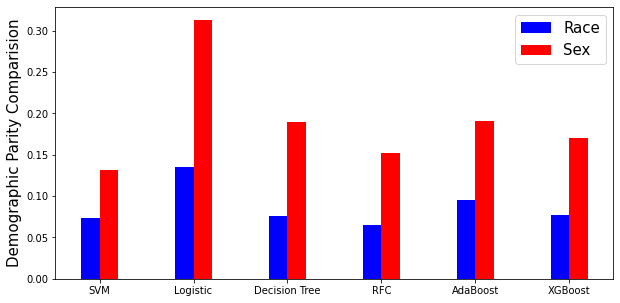

In [188]:
plt.figure(figsize=(10, 5))

# labels = ['age', 'education-num', 'hours-per-week', 'marital-status',
#        'native-country', 'occupation']

labels = ['SVM','Logistic','Decision Tree','RFC','AdaBoost','XGBoost']
x = np.arange(len(labels)) 
width = 0.2
plt.bar(x-width/2,height= demo_race,width=width,label='Race',color = "blue")
plt.bar(x+width/2,height= demo_sex,width=width,label='Sex', color = "red")
plt.legend(fontsize=15)

plt.ylabel('Demographic Parity Comparision',size=15)
plt.xticks(ticks=x,labels=labels)

In [189]:
oppo_race = []

oppo_race.append(opportunity(y_predSVC, x_test, y_test, 'race'))
oppo_race.append(opportunity(y_predLogistic, x_test, y_test, 'race'))
oppo_race.append(opportunity(y_predDT, x_test, y_test, 'race'))
oppo_race.append(opportunity(y_predRFC, x_test, y_test, 'race'))
oppo_race.append(opportunity(y_predAB, x_test, y_test, 'race'))
oppo_race.append(opportunity(y_predXG, x_test, y_test, 'race'))

oppo_race

[0.018873550632540148,
 0.0019381929100756867,
 0.013836204368144145,
 0.007219951899575694,
 0.03819682067927177,
 0.026682537199616774]

In [190]:
oppo_sex = []

oppo_sex.append(opportunity(y_predSVC, x_test, y_test, 'sex'))
oppo_sex.append(opportunity(y_predLogistic, x_test, y_test, 'sex'))
oppo_sex.append(opportunity(y_predDT, x_test, y_test, 'sex'))
oppo_sex.append(opportunity(y_predRFC, x_test, y_test, 'sex'))
oppo_sex.append(opportunity(y_predAB, x_test, y_test, 'sex'))
oppo_sex.append(opportunity(y_predXG, x_test, y_test, 'sex'))

oppo_sex

[0.11900656854436775,
 0.22397502459551333,
 0.05610374598597978,
 0.08595928996080948,
 0.0814022202524165,
 0.09337203676826322]

([<matplotlib.axis.XTick at 0x7fe3de7583d0>,
 [Text(0, 0, 'SVM'),
  Text(0, 0, 'Logistic'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'RFC'),
  Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'XGBoost')])

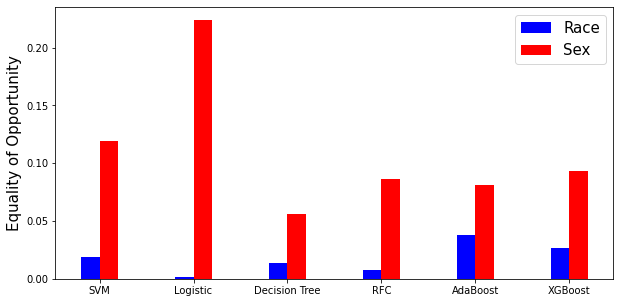

In [191]:
plt.figure(figsize=(10, 5))

# labels = ['age', 'education-num', 'hours-per-week', 'marital-status',
#        'native-country', 'occupation']

labels = ['SVM','Logistic','Decision Tree','RFC','AdaBoost','XGBoost']
x = np.arange(len(labels)) 
width = 0.2
plt.bar(x-width/2,height= oppo_race,width=width,label='Race',color = "blue")
plt.bar(x+width/2,height= oppo_sex,width=width,label='Sex', color = "red")
plt.legend(fontsize=15)

plt.ylabel('Equality of Opportunity',size=15)
plt.xticks(ticks=x,labels=labels)

In [192]:
equality_odd = []

equality_odd.append(equality_of_odds(y_predSVC, x_test, y_test, 'race'))
equality_odd.append(equality_of_odds(y_predLogistic, x_test, y_test, 'race'))
equality_odd.append(equality_of_odds(y_predDT, x_test, y_test, 'race'))
equality_odd.append(equality_of_odds(y_predRFC, x_test, y_test, 'race'))
equality_odd.append(equality_of_odds(y_predAB, x_test, y_test, 'race'))
equality_odd.append(equality_of_odds(y_predXG, x_test, y_test, 'race'))

equality_odd

[0.03712879748999111,
 0.11204827057044969,
 0.024455620297848313,
 0.008261289595567475,
 0.035180197974672006,
 0.012212616390520105]

In [193]:
equality_odd_sex = []

equality_odd_sex.append(equality_of_odds(y_predSVC, x_test, y_test, 'sex'))
equality_odd_sex.append(equality_of_odds(y_predLogistic, x_test, y_test, 'sex'))
equality_odd_sex.append(equality_of_odds(y_predDT, x_test, y_test, 'sex'))
equality_odd_sex.append(equality_of_odds(y_predRFC, x_test, y_test, 'sex'))
equality_odd_sex.append(equality_of_odds(y_predAB, x_test, y_test, 'sex'))
equality_odd_sex.append(equality_of_odds(y_predXG, x_test, y_test, 'sex'))

equality_odd_sex

[0.055060238054060594,
 0.25518121662020093,
 0.09647628874698536,
 0.049101807710704104,
 0.08890869727070913,
 0.05653420744372586]

([<matplotlib.axis.XTick at 0x7fe3df153450>,
 [Text(0, 0, 'SVM'),
  Text(0, 0, 'Logistic'),
  Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'RFC'),
  Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'XGBoost')])

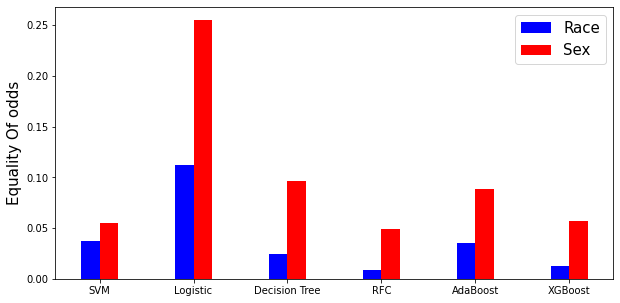

In [194]:
plt.figure(figsize=(10, 5))

# labels = ['age', 'education-num', 'hours-per-week', 'marital-status',
#        'native-country', 'occupation']

labels = ['SVM','Logistic','Decision Tree','RFC','AdaBoost','XGBoost']
x = np.arange(len(labels)) 
width = 0.2
plt.bar(x-width/2,height= equality_odd,width=width,label='Race',color = "blue")
plt.bar(x+width/2,height= equality_odd_sex,width=width,label='Sex', color = "red")
plt.legend(fontsize=15)

plt.ylabel('Equality Of odds',size=15)
plt.xticks(ticks=x,labels=labels)

Dropping the sensitive data.

In [196]:
y_lbl_drop=adult_df_enc.income

drop_race = adult_df_enc['race']
drop_sex = adult_df_enc['sex']
x_lbl_drop=adult_df_enc.drop('income', axis=1)
x_lbl_drop=x_lbl_drop.drop('race', axis=1)
x_lbl_drop=x_lbl_drop.drop('sex', axis=1)

x_lbl_drop

,age,workclass,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country
0,39,5,9,13,4,0,1,2174,0,39,38
1,50,4,9,13,2,3,0,0,0,12,38
2,38,2,11,9,0,5,1,0,0,39,38
3,53,2,1,7,2,5,0,0,0,39,38
4,28,2,9,13,2,9,5,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,7,12,2,12,5,0,0,37,38
32557,40,2,11,9,2,6,0,0,0,39,38
32558,58,2,11,9,6,0,4,0,0,39,38
32559,22,2,11,9,4,0,3,0,0,19,38


In [197]:
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(x_lbl_drop, y_lbl_drop, test_size=0.3, random_state=13)

In [198]:
#XGBoost  
model = xgb.XGBClassifier()
model.fit(x_train_d, y_train_d)

#Get predictions
y_predXG_d = model.predict(x_test_d)
y_predXG_d

array([0, 0, 0, ..., 1, 0, 0])

In [92]:
#random forest
rfc = RandomForestClassifier(random_state = 27, max_depth = 8)
rfc.fit(x_train_d, y_train_d)
y_predRFC_d = rfc.predict(x_test_d)
y_predRFC_d

array([0, 0, 0, ..., 1, 0, 0])

In [93]:
print('Accuracy Score RFC: ',metrics.accuracy_score(y_test_d,y_predRFC_d)*100,'%',sep='')
print('Confusion Matrix RFC: ',metrics.confusion_matrix(y_test_d,y_predRFC_d), sep = '\n')
print("F1: RFC: ",f1_score(y_test_d, y_predRFC_d))

Accuracy Score RFC: 85.57851696320036%
Confusion Matrix RFC: 
[[6517  277]
 [1028 1227]]
F1: RFC:  0.6528332003192339


In [199]:
print('Accuracy Score XGBoost: ',metrics.accuracy_score(y_test_d,y_predXG_d)*100,'%',sep='')
print('Confusion Matrix XGBoost: ',metrics.confusion_matrix(y_test_d,y_predXG_d), sep = '\n')
print("F1: XGBoost: ",f1_score(y_test_d, y_predXG_d))

Accuracy Score XGBoost: 86.3631340479611%
Confusion Matrix XGBoost: 
[[6470  324]
 [ 910 1345]]
F1: XGBoost:  0.6855249745158002


In [201]:
print("Demographic Parity Race | XGBoost",demoParity(y_predXG_d, x_test, 'race'))
print("Demographic Parity sex | XGBoost",demoParity(y_predXG_d, x_test, 'sex'))

print("Equality of Opportunity Race | XGBoost",opportunity(y_predXG_d, x_test, y_test_d, 'race'))
print("Equality of opportunity sex | XGBoost",opportunity(y_predXG_d, x_test, y_test_d, 'sex'))

print("Equality of odds Race | XGBoost",equality_of_odds(y_predXG_d, x_test, y_test_d, 'race'))
print("Equality of odds sex | XGBoost",equality_of_odds(y_predXG_d, x_test, y_test_d, 'sex'))

Demographic Parity Race | XGBoost 0.07742743420633687
Demographic Parity sex | XGBoost 0.16122784325890915
Equality of Opportunity Race | XGBoost 0.03689410085446687
Equality of opportunity sex | XGBoost 0.06469512927661591
Equality of odds Race | XGBoost 0.010785352710439886
Equality of odds sex | XGBoost 0.05103455921060607


Removing the correlated attributes.

In [203]:
corr = adult_df_enc.corr()

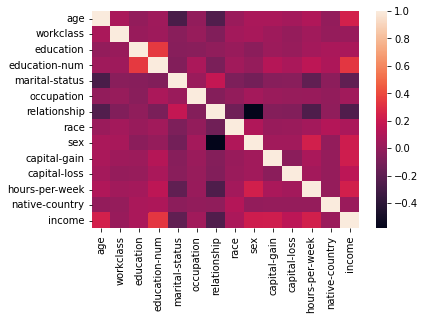

In [204]:
sns.heatmap(corr)

In [206]:
#Target variable 
y = [1 if y == '>50K' else 0 for y in adult_df_enc['income']]

#Model features

adult_df_enc.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13,4,0,1,1,1,2174,0,39,38,0
1,50,4,9,13,2,3,0,1,1,0,0,12,38,0
2,38,2,11,9,0,5,1,1,1,0,0,39,38,0
3,53,2,1,7,2,5,0,0,1,0,0,39,38,0
4,28,2,9,13,2,9,5,0,0,0,0,39,4,0


([<matplotlib.axis.XTick at 0x7fe3de49aa10>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'workclass'),
  Text(0, 0, 'education'),
  Text(0, 0, 'education-num'),
  Text(0, 0, 'marital-status'),
  Text(0, 0, 'occupation'),
  Text(0, 0, 'relationship'),
  Text(0, 0, 'race'),
  Text(0, 0, 'sex'),
  Text(0, 0, 'capital-gain'),
  Text(0, 0, 'capital-loss'),
  Text(0, 0, 'hours-per-week'),
  Text(0, 0, 'native-country'),
  Text(0, 0, 'income')])

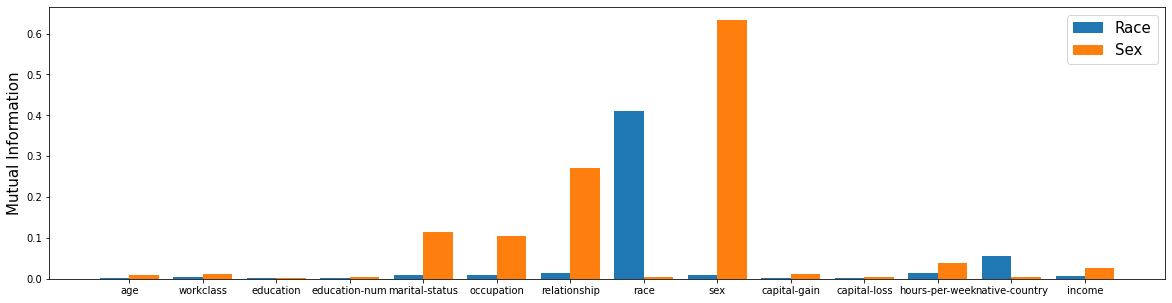

In [207]:
#Mutual information 

#Calcualte mutual information
mut_race = mutual_info_classif(adult_df_enc,df_fair['priv_race'],discrete_features=[1,3,4,5])
mut_sex = mutual_info_classif(adult_df_enc,df_fair['priv_sex'],discrete_features=[1,3,4,5])


#Plot mutual information 
plt.figure(figsize=(20, 5))

# labels = ['age', 'education-num', 'hours-per-week', 'marital-status',
#        'native-country', 'occupation']

labels = ['age', 'workclass', 'education','education-num', 'marital-status', 'occupation','relationship','race','sex','capital-gain','capital-loss', 'hours-per-week',
         'native-country', 'income']
x = np.arange(len(labels)) 
width = 0.4
plt.bar(x-width/2,height= mut_race,width=width,label='Race')
plt.bar(x+width/2,height= mut_sex,width=width,label='Sex')
plt.legend(fontsize=15)

plt.ylabel('Mutual Information',size=15)
plt.xticks(ticks=x,labels=labels)

#plt.savefig(path.format("Mutual_information.png"),dpi=100)

In [208]:
adult_df_enc

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13,4,0,1,1,1,2174,0,39,38,0
1,50,4,9,13,2,3,0,1,1,0,0,12,38,0
2,38,2,11,9,0,5,1,1,1,0,0,39,38,0
3,53,2,1,7,2,5,0,0,1,0,0,39,38,0
4,28,2,9,13,2,9,5,0,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,7,12,2,12,5,1,0,0,0,37,38,0
32557,40,2,11,9,2,6,0,1,1,0,0,39,38,1
32558,58,2,11,9,6,0,4,1,0,0,0,39,38,0
32559,22,2,11,9,4,0,3,1,1,0,0,19,38,0


In [209]:
y_lbl_proxy=adult_df_enc.income

#drop_race = adult_df_enc['race']
#drop_sex = adult_df_enc['sex']
x_lbl_proxy=adult_df_enc.drop('income', axis=1)
x_lbl_proxy=x_lbl_proxy.drop('race', axis=1)
x_lbl_proxy=x_lbl_proxy.drop('sex', axis=1)
x_lbl_proxy=x_lbl_proxy.drop('relationship', axis=1)
x_lbl_proxy=x_lbl_proxy.drop('marital-status', axis=1)
x_lbl_proxy=x_lbl_proxy.drop('occupation', axis=1)
x_lbl_proxy=x_lbl_proxy.drop('native-country', axis=1)

x_lbl_proxy

,age,workclass,education,education-num,capital-gain,capital-loss,hours-per-week
0,39,5,9,13,2174,0,39
1,50,4,9,13,0,0,12
2,38,2,11,9,0,0,39
3,53,2,1,7,0,0,39
4,28,2,9,13,0,0,39
...,...,...,...,...,...,...,...
32556,27,2,7,12,0,0,37
32557,40,2,11,9,0,0,39
32558,58,2,11,9,0,0,39
32559,22,2,11,9,0,0,19


Dropping proxy and sensitive info

In [210]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_lbl_proxy, y_lbl_proxy, test_size=0.3, random_state=13)

In [211]:
#XGBoost  
model = xgb.XGBClassifier()
model.fit(x_train_p, y_train_p)

#Get predictions
y_predXG_p = model.predict(x_test_p)
y_predXG_p

array([0, 0, 0, ..., 0, 0, 0])

In [212]:
print('Accuracy Score XGBoost: ',metrics.accuracy_score(y_test_p,y_predXG_p)*100,'%',sep='')
print('Confusion Matrix XGBoost: ',metrics.confusion_matrix(y_test_p,y_predXG_p), sep = '\n')
print("F1: XGBoost: ",f1_score(y_test_p, y_predXG_p))

Accuracy Score XGBoost: 83.4567355508896%
Confusion Matrix XGBoost: 
[[6539  255]
 [1242 1013]]
F1: XGBoost:  0.5750780584728924


In [213]:
print("Demographic Parity Race | XGBoost",demoParity(y_predXG_p, x_test, 'race'))
print("Demographic Parity sex | XGBoost",demoParity(y_predXG_p, x_test, 'sex'))

print("Equality of Opportunity Race | XGBoost",opportunity(y_predXG_p, x_test, y_test_p, 'race'))
print("Equality of opportunity sex | XGBoost",opportunity(y_predXG_p, x_test, y_test_p, 'sex'))

print("Equality of odds Race | XGBoost",equality_of_odds(y_predXG_p, x_test, y_test_p, 'race'))
print("Equality of odds sex | XGBoost",equality_of_odds(y_predXG_p, x_test, y_test_p, 'sex'))

Demographic Parity Race | XGBoost 0.06663766578165665
Demographic Parity sex | XGBoost 0.08468549562332142
Equality of Opportunity Race | XGBoost 0.013203175410124557
Equality of opportunity sex | XGBoost 0.02874996347200981
Equality of odds Race | XGBoost 0.021222515124120347
Equality of odds sex | XGBoost 0.0029097223590949933
